# Chapter 4: Training Models - A Practical Walkthrough

This notebook provides a hands-on and intuitive guide to the core concepts of training machine learning models, as presented in Chapter 4 of *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. We'll explore various techniques for training linear models, from direct analytical solutions to iterative optimization algorithms. We will also delve into Polynomial Regression for fitting non-linear data, and the crucial concepts of learning curves and regularization to combat overfitting. Finally, we'll cover Logistic and Softmax Regression for classification tasks.

Each section includes clear explanations of the underlying theory and executable Python code, making it an ideal resource for learning and a showcase of practical machine learning skills for your portfolio.

## 1. 🔶 Linear Regression

Linear regression is a fundamental algorithm for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

### A. The Normal Equation

The Normal Equation is a closed-form solution for finding the optimal parameters ($	heta$) in a linear regression model. It directly calculates the values of $	heta$ that minimize the cost function.

The formula for the Normal Equation is:
$$ \theta = (X^T X)^{-1} X^T y $$

Where:
- $\theta$ is the vector of model parameters that minimizes the cost function.
- $X$ is the matrix of input features (with a bias term added).
- $y$ is the vector of target values.

In [9]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from numpy.linalg import inv

# Load the California housing dataset
housing = fetch_california_housing()

# Add a bias term (x0 = 1) to each instance
X = np.c_[np.ones((len(housing.data), 1)), housing.data]
y = housing.target.reshape(-1, 1)

# Calculate the best-fit parameters using the Normal Equation
theta_best = inv(X.T.dot(X)).dot(X.T).dot(y)

print("Best-fit parameters (first 5):", theta_best[:5])

Best-fit parameters (first 5): [[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]]


### B. Computational Complexity

The Normal Equation has a computational complexity of $O(n^3)$, where 'n' is the number of features. This makes it computationally expensive and slow for datasets with a large number of features (e.g., >100,000). For such cases, gradient-based optimization methods are preferred.

---

## 2. 🔺 Gradient Descent

Gradient Descent is an iterative optimization algorithm used to find the minimum of a function. In the context of machine learning, we use it to minimize the cost function (e.g., Mean Squared Error) by iteratively adjusting the model's parameters.

### A. Batch Gradient Descent

In Batch Gradient Descent, the gradients are calculated based on the entire training dataset in each iteration. This results in a stable convergence but can be slow for large datasets.

The update rule for Batch Gradient Descent is:
$$ \theta_{\text{next step}} = \theta - \eta \nabla_{\theta} \text{MSE}(\theta) $$

Where:
- $\eta$ is the learning rate.
- $\nabla_{\theta} \text{MSE}(\theta)$ is the gradient of the Mean Squared Error cost function with respect to the parameters $\theta$.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


eta = 0.01  # Learning rate
n_iterations = 1000
m = len(X_scaled)

# Randomly initialize the parameters
theta = np.random.randn(9, 1)  # 8 features + bias term

for i in range(n_iterations):
    gradients = 2/m * X_scaled.T.dot(X_scaled.dot(theta) - y)
    theta -= eta * gradients

print(theta)

[[-0.4307315 ]
 [ 0.67370341]
 [ 0.13239238]
 [ 0.10924043]
 [-0.03946827]
 [ 0.00248386]
 [-0.03715592]
 [-0.94686919]
 [-0.89549858]]


### B. Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent updates the parameters based on a single randomly selected instance from the training set at each step. This makes it much faster than Batch GD and allows it to escape local minima, but its convergence is more erratic.

The update rule for SGD is similar to Batch GD, but the gradient is computed on a single instance at a time.

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # Learning schedule hyperparameters

def learning_rate_schedule(t):
    return t0 / (t + t1)

theta_sgd = np.random.randn(9, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_scaled[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        eta = learning_rate_schedule(epoch * m + i)
        theta_sgd -= eta * gradients

print("Theta from SGD (first 5):", theta_sgd[:5])

Theta from SGD (first 5): [[-1.66733965]
 [ 0.83124659]
 [ 0.12609832]
 [-0.26378369]
 [ 0.31598439]]


### C. Mini-batch Gradient Descent

Mini-batch Gradient Descent is a compromise between Batch GD and SGD. It computes the gradients on small random subsets of the training data called mini-batches. This provides a good balance between the stability of Batch GD and the speed of SGD.

In [14]:
batch_size = 32
n_batches = int(np.ceil(m / batch_size))
theta_mbgd = np.random.randn(9, 1)

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X_scaled[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(n_batches):
        start_index = i * batch_size
        end_index = start_index + batch_size
        xi = X_shuffled[start_index:end_index]
        yi = y_shuffled[start_index:end_index]
        gradients = 2 / batch_size * xi.T.dot(xi.dot(theta_mbgd) - yi)
        theta_mbgd -= eta * gradients

print("Theta from Mini-batch GD (first 5):", theta_mbgd[:5])

Theta from Mini-batch GD (first 5): [[-2.34048828]
 [-1.46406467]
 [-0.08709991]
 [ 0.25141568]
 [ 0.84006079]]


---

## 3. ⚙️ Polynomial Regression

Polynomial Regression is a form of linear regression where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. This allows us to fit non-linear data.

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Create a pipeline that first adds polynomial features and then performs linear regression
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

polynomial_regression.fit(housing.data, housing.target)
print("Polynomial model coefficients (first 5):", polynomial_regression.named_steps["lin_reg"].coef_[:5])

Polynomial model coefficients (first 5): [-1.12430252e+01 -8.48898546e-01  6.44105893e+00 -3.15913284e+01
  4.06090349e-04]


---

## 4. 📈 Learning Curves

Learning curves are plots of the model's performance on the training set and the validation set as a function of the training set size. They are a valuable tool for diagnosing problems like underfitting and overfitting.

🩺 How It Helps Diagnose Issues
✅ 1. Detecting Underfitting
Shape:

Training error: high

Validation error: also high

Both errors close together

Diagnosis:
Your model is too simple — it can’t even learn the training data well.

Fix:

Use a more complex model

Add features

Reduce regularization

🚨 2. Detecting Overfitting
Shape:

Training error: low

Validation error: much higher

Big gap between them

Diagnosis:
Your model learns the training data too well, but can't generalize to new data.

Fix:

Use more training data

Simplify the model

Use regularization (like L1 or L2)

Use data augmentation (in vision tasks)

🎯 3. Just Right (Good Fit)
Shape:

Both errors are low

Validation error is not too far from training error

Both flatten out

🎉 This is what you want!

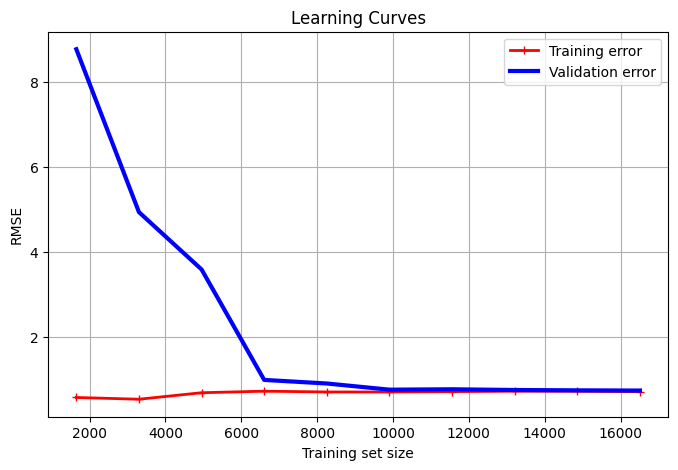

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge

train_sizes, train_scores, valid_scores = learning_curve(
    Ridge(alpha=1), housing.data, housing.target, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

train_errors = np.sqrt(-train_scores.mean(axis=1))
valid_errors = np.sqrt(-valid_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='Training error')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

---

## 5. 🧩 Regularized Linear Models

Regularization techniques are used to prevent overfitting by adding a penalty term to the cost function. This discourages the model from learning overly complex patterns in the training data.

### A. Ridge Regression

Ridge Regression adds an L2 penalty term to the cost function, which is the sum of the squared values of the model's weights. This helps to keep the weights small.

The Ridge Regression cost function is:
$$ J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2 $$

In [16]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(housing.data, housing.target)
print("Ridge prediction for the first instance:", ridge_reg.predict([housing.data[0]]))

Ridge prediction for the first instance: [4.13154653]


### B. Lasso Regression

Lasso (Least Absolute Shrinkage and Selection Operator) Regression adds an L1 penalty term to the cost function, which is the sum of the absolute values of the model's weights. A key feature of Lasso is that it can shrink the weights of unimportant features to exactly zero, effectively performing feature selection.

The Lasso Regression cost function is:
$$ J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} |\theta_i| $$

In [24]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(housing.data, housing.target)
print("Number of non-zero coefficients in Lasso:", np.sum(lasso_reg.coef_ != 0))
print("Prediction for the first instance:", lasso_reg.predict([housing.data[0]]))

Number of non-zero coefficients in Lasso: 6
Prediction for the first instance: [3.98443921]


### C. Elastic Net

Elastic Net is a middle ground between Ridge and Lasso regression. It combines both L1 and L2 penalties, allowing for a balance between the two.

The Elastic Net cost function is:
$$ J(\theta) = \text{MSE}(\theta) + r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_i^2 $$

In [25]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(housing.data, housing.target)
print("Elastic Net score:", elastic_net.score(housing.data, housing.target))

Elastic Net score: 0.5760444327963039


### D. Early Stopping

Early stopping is a regularization technique that involves stopping the training process as soon as the validation error reaches a minimum. This prevents the model from overfitting by not allowing it to continue learning from the training data once it starts to perform worse on unseen data.

In [29]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(housing.data)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, housing.target, test_size=0.2, random_state=42)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, 
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train, y_train)
    y_val_predict = sgd_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
    else:
        break

print("Early stopping at epoch:", best_epoch)

Early stopping at epoch: 2


---

## 6. 🔵 Logistic Regression

Logistic Regression is a classification algorithm used to predict a binary outcome (e.g., 0 or 1, true or false). It estimates the probability that an instance belongs to a particular class.

### A. Estimating Probabilities and Making Predictions

Logistic Regression models the probability of an instance belonging to the positive class using the logistic function (also known as the sigmoid function). The prediction is then made based on whether this probability is above or below a certain threshold (usually 0.5).

In [30]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=42)

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_moons, y_moons)

print("Logistic Regression Score:", log_reg.score(X_moons, y_moons))
print("\nPredicted classes for the first 5 instances:", log_reg.predict(X_moons[:5]))
print("\nProbabilities for the first 5 instances:\n", log_reg.predict_proba(X_moons[:5]))

Logistic Regression Score: 0.868

Predicted classes for the first 5 instances: [0 1 1 1 0]

Probabilities for the first 5 instances:
 [[0.87945767 0.12054233]
 [0.03461032 0.96538968]
 [0.1891155  0.8108845 ]
 [0.04959407 0.95040593]
 [0.9511847  0.0488153 ]]


### B. Decision Boundaries

The decision boundary is the line or surface that separates the different classes. In Logistic Regression, this boundary is linear.

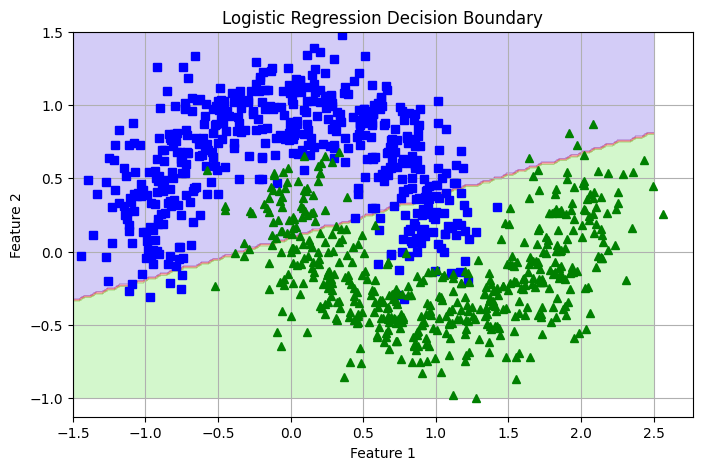

In [31]:
def plot_decision_boundary(model, X, y, axes, title):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.figure(figsize=(8, 5))
plot_decision_boundary(log_reg, X_moons, y_moons, [-1.5, 2.5, -1, 1.5], "Logistic Regression Decision Boundary")
plt.grid(True)
plt.show()

### C. Softmax Regression (Multinomial Logistic Regression)

Softmax Regression is a generalization of Logistic Regression that can handle multiple classes. It computes the probability of an instance belonging to each class and then predicts the class with the highest probability.

The cost function for Softmax Regression is the Cross-Entropy loss:
$$ J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)}) $$

In [39]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris["data"][:, (2, 3)]  # petal length, petal width
y_iris = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_iris, y_iris)

print("Predicted classes for the first 5 instances:", softmax_reg.predict(X_iris[:5]))
print("\nProbabilities for the first 5 instances:\n", softmax_reg.predict_proba(X_iris[:5]))

Predicted classes for the first 5 instances: [0 0 0 0 0]

Probabilities for the first 5 instances:
 [[9.97093135e-01 2.90686533e-03 7.30629127e-14]
 [9.97093135e-01 2.90686533e-03 7.30629127e-14]
 [9.98192492e-01 1.80750779e-03 2.96229168e-14]
 [9.95328258e-01 4.67174178e-03 1.80084082e-13]
 [9.97093135e-01 2.90686533e-03 7.30629127e-14]]


/home/ubuntu22/projects/ml-tutorials/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#### Softmax Regression Decision Boundaries

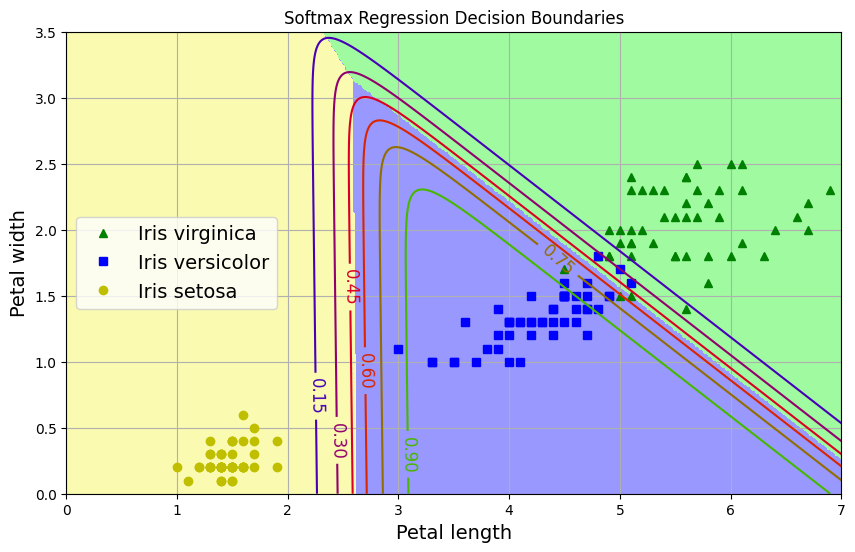

In [40]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 6))
plt.plot(X_iris[y_iris==2, 0], X_iris[y_iris==2, 1], "g^", label="Iris virginica")
plt.plot(X_iris[y_iris==1, 0], X_iris[y_iris==1, 1], "bs", label="Iris versicolor")
plt.plot(X_iris[y_iris==0, 0], X_iris[y_iris==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.title("Softmax Regression Decision Boundaries")
plt.axis([0, 7, 0, 3.5])
plt.grid(True)
plt.show()

---

## ✅ Chapter Summary

This chapter has provided a comprehensive overview of training linear models for both regression and classification tasks. We've covered:

* **Linear Regression:** Understanding the Normal Equation and the trade-offs of using iterative methods like Batch, Stochastic, and Mini-batch Gradient Descent.
* **Polynomial Regression:** Extending linear models to fit non-linear data.
* **Model Evaluation and Regularization:** Using learning curves to diagnose model performance and applying Ridge, Lasso, and Elastic Net regularization, as well as Early Stopping, to prevent overfitting.
* **Logistic and Softmax Regression:** Implementing models for binary and multiclass classification, and visualizing their decision boundaries.

By mastering these fundamental concepts and their practical implementations, you have built a strong foundation for tackling a wide range of machine learning problems.